In [32]:
import requests
import time
import io
import pandas as pd

from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw

#### identity_type: same_stereo_isotope
24726 "C(/C=C/Cl)Cl"


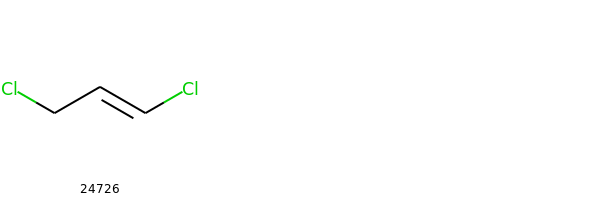

#### identity_type: same_stereo
24726 "C(/C=C/Cl)Cl"
102602172 "[2H]/C(=C(/[2H])\Cl)/C([2H])([2H])Cl"


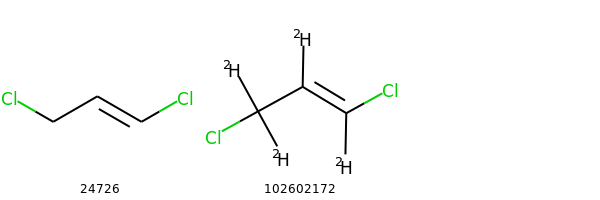

#### identity_type: same_isotope
24726 "C(/C=C/Cl)Cl"
24883 "C(C=CCl)Cl"
5280970 "C(/C=C\Cl)Cl"


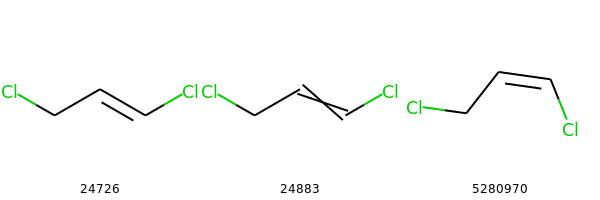

#### identity_type: same_connectivity
24726 "C(/C=C/Cl)Cl"
24883 "C(C=CCl)Cl"
5280970 "C(/C=C\Cl)Cl"
102602172 "[2H]/C(=C(/[2H])\Cl)/C([2H])([2H])Cl"
131875718 "[2H]C(=C([2H])Cl)C([2H])([2H])Cl"


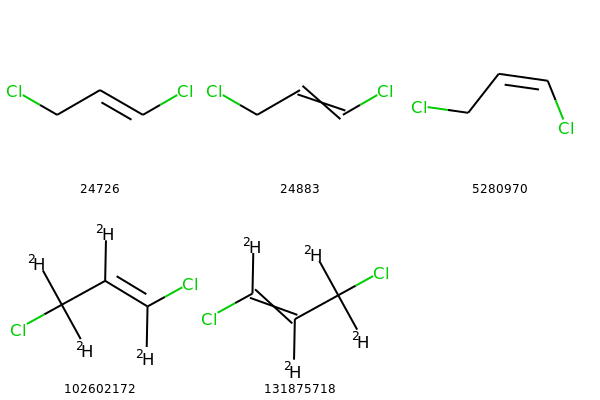

In [9]:
# chemical sameness search

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'

mydata = {'smiles' : 'C(/C=C/Cl)Cl'}
options = ['same_stereo_isotope', 'same_stereo', 'same_isotope', 'same_connectivity']

for option in options:
    print('#### identity_type:', option)
    
    url = prolog + '/compound/fastidentity/smiles/property/isomericsmiles/csv?identity_type=' + option
    res = requests.post(url, data=mydata)
    
    cids = []
    smiles = []
    
    fi = io.StringIO(res.text)
    fi.readline()  # skip first line
    
    for line in fi:
        cid_tmp, smiles_tmp = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)
        
        cids.append(cid_tmp)
        smiles.append(smiles_tmp.replace('"', ''))
    
    mols = []
    
    for smile in smiles:
        mol = Chem.MolFromSmiles(smile)
        Chem.FindPotentialStereoBonds(mol)
        mols.append(mol)
        
    img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200, 200), legends=cids)
    display(img)
    time.sleep(0.2)

In [35]:
# find compounds with same atom connectivity and isotope info
# get cid, ismoeric smile, first 5 chemical synonyms, strucure image

def ex_1a(query):
    
    prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
    options = ['same_isotope', 'same_connectivity']
    data = {'smiles' : query}
    
    df = pd.DataFrame()
    for option in options:
        cids = []
        smiles = []
        synonyms = []
    
        # get cid and smile
        url = prolog + '/compound/fastidentity/smiles/property/isomericsmiles/csv?identity_type=' + option
        res = requests.post(url, data=data)
       
        fi = io.StringIO(res.text)
        fi.readline()
        
        for line in fi:
            cid_tmp, smile_tmp = line.rstrip().split(',')
            cids.append(cid_tmp)
            smiles.append(smile_tmp)
        
        # get first 5 synonym
        for cid in cids:
            url = prolog + f'/compound/cid/{cid}/synonyms/txt'
            res = requests.get(url)
            syns = res.text.split()[:5]
            synonyms.append(syns)
        
        df_temp = pd.DataFrame({'cid' : cids,
                                'smiles' : smiles,
                                'syns' : synonyms})
        df_temp['option'] = option
        
        df = pd.concat([df, df_temp], ignore_index=True)
    
    df['smiles'] = df['smiles'].str.replace('"', '')
    PandasTools.AddMoleculeColumnToFrame(df, 'smiles')
        
    return df

,cid,smiles,syns,option,ROMol
0,9568614,CC1=CN=C(C(=C1OC)C)C[S@](=O)C2=NC3=C(N2)C=C(C=...,"[Esomeprazole, (S)-Omeprazole, (-)-Omeprazole,...",same_isotope,
1,4594,CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC,"[omeprazole, 73590-58-6, Losec, Prilosec, Antra]",same_isotope,
2,9579578,CC1=CN=C(C(=C1OC)C)C[S@@](=O)C2=NC3=C(N2)C=C(C...,"[(r)-omeprazole, Esomeprazole, 119141-89-8, (R...",same_isotope,
3,9568614,CC1=CN=C(C(=C1OC)C)C[S@](=O)C2=NC3=C(N2)C=C(C=...,"[Esomeprazole, (S)-Omeprazole, (-)-Omeprazole,...",same_connectivity,
4,4594,CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC,"[omeprazole, 73590-58-6, Losec, Prilosec, Antra]",same_connectivity,
5,9579578,CC1=CN=C(C(=C1OC)C)C[S@@](=O)C2=NC3=C(N2)C=C(C...,"[(r)-omeprazole, Esomeprazole, 119141-89-8, (R...",same_connectivity,
6,16111637,[2H]C1=C(C(=C(C(=N1)C([2H])([2H])S(=O)C2=NC3=C...,[SCHEMBL13645431],same_connectivity,
7,44200396,[2H]C1=C(C(=C(C(=N1)CS(=O)C2=NC3=C(N2)C=C(C=C3...,[SCHEMBL13411612],same_connectivity,
8,45040154,[2H]C([2H])([2H])OC1=CC2=C(C=C1)N=C(N2)S(=O)CC...,"[Omeprazole-d3, Omeprazole, D3, 922731-01-9, 9...",same_connectivity,
9,45359049,[2H]C([2H])([2H])OC1=C(C(=NC=C1C)CS(=O)C2=NC3=...,"[SCHEMBL3175427, SCHEMBL13645151, DTXSID906700...",same_connectivity,

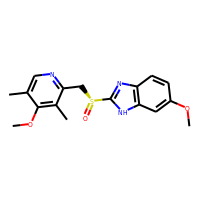
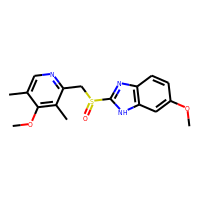
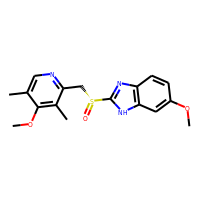
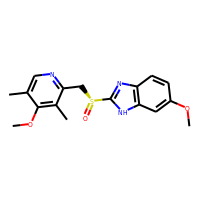
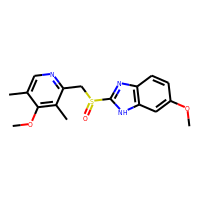
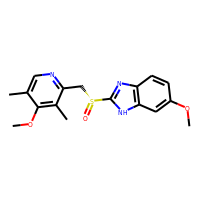
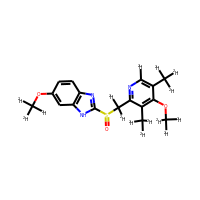
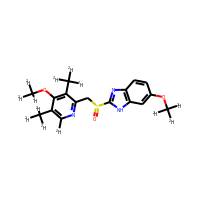
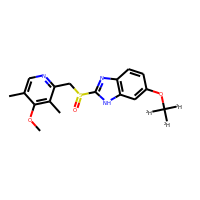
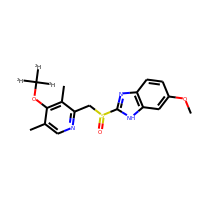
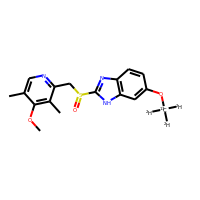
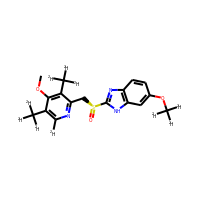
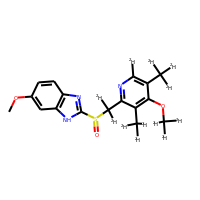
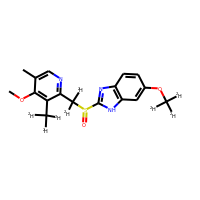
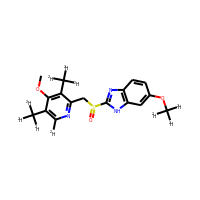
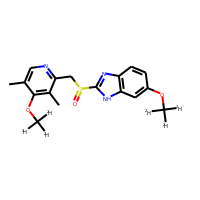
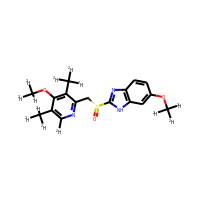
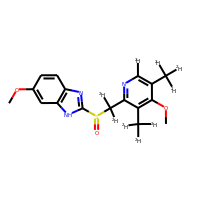
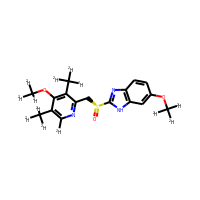
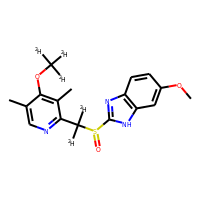
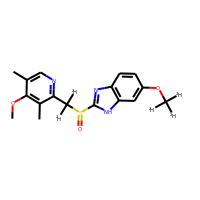
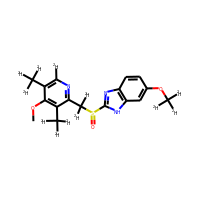
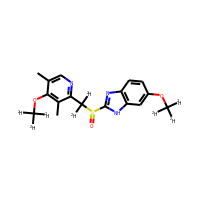
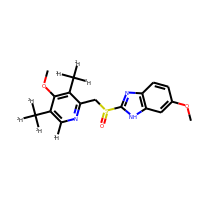
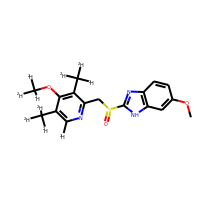
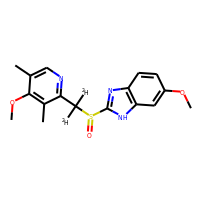
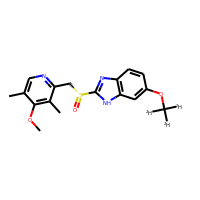
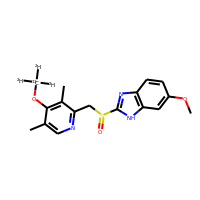
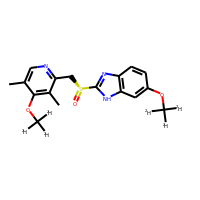
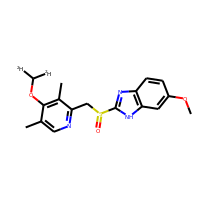
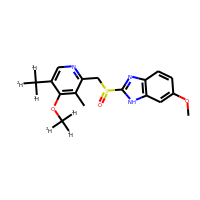
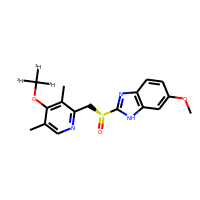
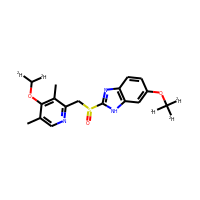
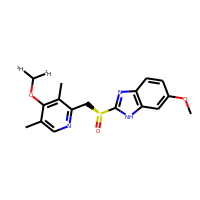
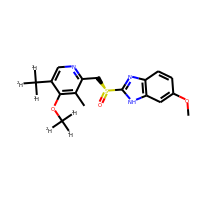
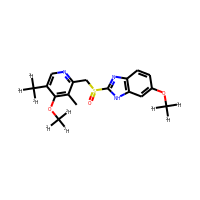
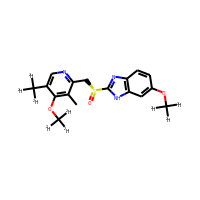
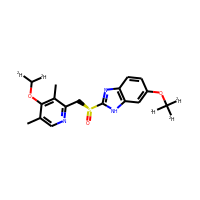
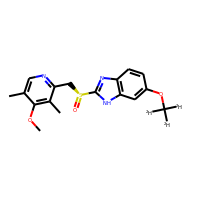
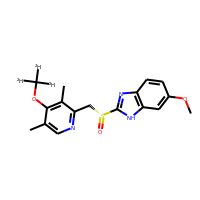
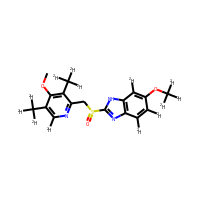
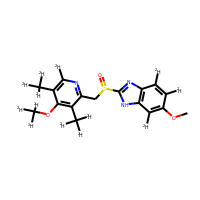
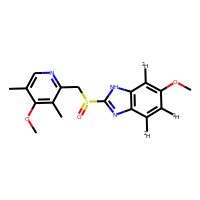
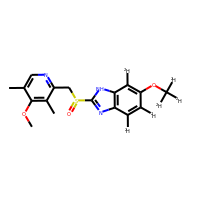
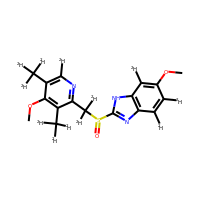
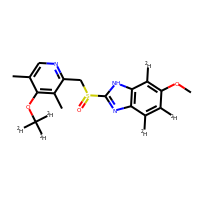
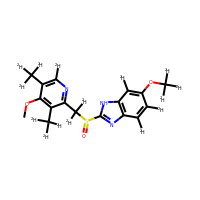
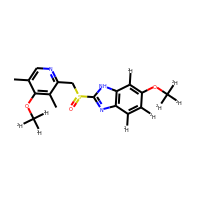
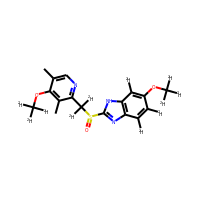
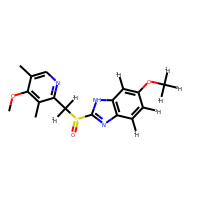
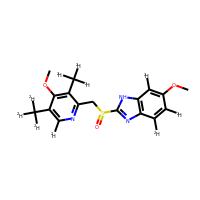
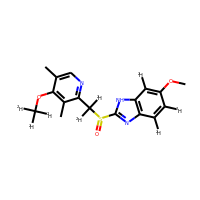
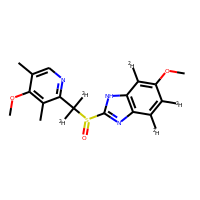
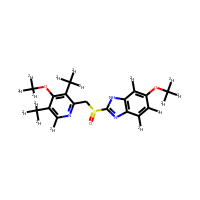
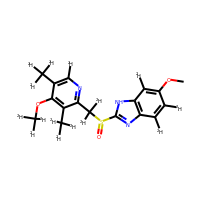
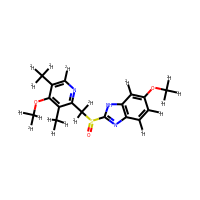
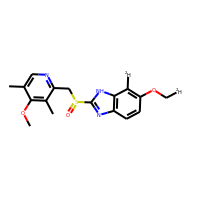
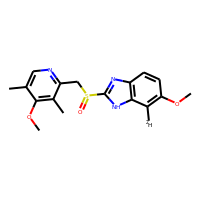
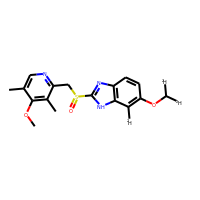

In [36]:
query = "CC1=CN=C(C(=C1OC)C)C[S@](=O)C2=NC3=C(N2)C=C(C=C3)OC"
ex_1a(query)

In [37]:
# similarity search

data = {'smiles' : "C1COCC(=O)N1C2=CC=C(C=C2)N3C[C@@H](OC3=O)CNC(=O)C4=CC=C(S4)Cl" }
url = prolog + '/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=99'
res = requests.post(url, data=data)
cids = res.text.split()
print('# Number of cids: {}'.format(len(cids)))
print(cids)

# Number of cids: 33
['9875401', '6433119', '11524901', '68152323', '25190310', '25164166', '145624246', '145624236', '144489887', '143433422', '123868009', '56598114', '56589668', '25255944', '11994745', '25190129', '25190130', '25190186', '25190187', '25190188', '25190189', '25190190', '25190248', '25190249', '25190250', '25190251', '25190252', '25190311', '25255845', '25255945', '25255946', '49849874', '133687098']


In [39]:
url1 = prolog + '/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=95'
url2 = prolog + '/compound/fastsimilarity_2d/smiles/cids/txt?threshold=95'  # ignored, case sensitive

res1 = requests.post(url1, data=data)
res2 = requests.post(url2, data=data)
cids1 = res1.text.split()
cids2 = res2.text.split()

print('Number of cids', len(cids1), len(cids2))

Number of cids 200 911


In [40]:
# 3d search

data = {'smiles' : 'CC(=O)OC1=CC=CC=C1C(=O)O'}
url = prolog + '/compound/fastsimilarity_3d/smiles/cids/txt'
res = requests.post(url, data=data)
cids = res.text.split()
print(len(cids))

22132


In [66]:
# 2d similarity search with smiles
# threshold 0.8
# get cids
# aids for active cids
# retrieve gene symbolds of the targets

def ex_2a(smiles):
    
    prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
    
    # get similar cids
    url = prolog + f'/compound/fastsimilarity_2d/smiles/aids/txt?Threshold=80&aids_type=active'
    data = {'smiles' : smiles}
    r = requests.post(url, data=data)
    
    aids = r.text.split()
    aids_str = ','.join(aids)
    
    url = prolog + f'/assay/aid/{aids_str}/targets/GeneSymbol/txt'
    r = requests.get(url)
    
    gene_symbols = r.text.split()
    
    print(len(aids))
    print(len(gene_symbols))
    
    print(gene_symbols)
    

In [67]:
query='[C@@H]23C(=O)[C@H](N)C(C)[C@H](CCC1=COC=C1)[C@@]2(C)CCCC3(C)C'
ex_2a(query)

99
126
['ATP1A1', 'ATP1A2', 'ATP1A3', 'ATP1A4', 'ATP1B1', 'ATP1B2', 'ATP1B3', 'FXYD2', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRM1', 'OPRK1', 'ANPEP', 'ANPEP', 'NR1H4', 'NR1H4', 'NR1H4', 'NR1I2', 'ATP1A1', 'ATP1A2', 'ATP1A3', 'ATP1A4', 'ATP1B1', 'ATP1B2', 'ATP1B3', 'FXYD2', 'NR1H4', 'NR1H4', 'NR1H4', 'NR1H4', 'NR1H4', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'OPRK1', 'Htr1a', 'NR1H4', 'NR1H4', 'NR1H4', 'NR1H4', 'NR1H4', 'NR1I2', 'NR1H4', 'NR1H4', 'NR1H4', 'NR1I2', 'NR1H4', 'NR1H4', 'OPRK1', 'HTR2C', 'GALE', 'NR0B1', 'CRHBP', 'CRHR2', 'NR1H4', 'ACHE', 'ADORA1', 'PARP1', 'AGTR1', 'ALOX5', 'AR', 'CACNA1C', 'CCKAR', 'CDK2', 'CHEK1', 'CHRNA1', 'CNR1', 'CRHR1', 'MAPK14', 'DHFR', 'DRD2', 'EDNRA', 'EGFR', 'ESR1', 'F2', 'F10', 'FNTA', 'GABRA1', 'GRIN1', 'GRM2', 'HTR1A', 'ITGA2B', 'KCNJ5', 'MMP1', 

In [68]:
# substructure search

query = 'C12(SCC(=C(N1C([C@H]2NC(=O)[*])=O)C(=O)O[H])[*])[H]'
data = {'smiles' : query}
url = prolog + '/compound/fastsubstructure/smiles/cids/txt?Stereo=exact'
res = requests.post(url, data=data)
cids = res.text.split()
print('# number of cids:', len(cids))



# number of cids: 23797


In [82]:
# substructure search
# XRefs to retrieve patent ids
# ignore CID-patent id mapping

def ex_3a(query):
    
    # get cids
    data = {'smiles' : query}
    url = prolog + '/compound/fastsubstructure/smiles/cids/txt'
    r = requests.post(url, data=data)
    cids = r.text.split()
    
    # get patent ids, cid to xrefs
    patents = []
    for cid in cids[:10]:
        url = prolog + f'/compound/cid/{cid}/xrefs/PatentID/txt'
        r = requests.get(url)
        patent = r.text.split()
        patents.append(patent)
        
        time.sleep(0.2)
        
    return patents
    
    


In [83]:
query="C[C@@H](C(=O)OC(C)C)N[P@](=O)(OC[C@@H]1[C@H]([C@@]([C@@H](O1)N2C=CC(=O)NC2=O)(C)F)O)OC3=CC=CC=C3"
ex_3a(query)

[['EP2203462B1',
  'EP2432792B1',
  'EP2552930A2',
  'EP2552930B1',
  'EP2609923A2',
  'EP2609923B1',
  'EP2610264A2',
  'EP2709613B1',
  'EP2801580A1',
  'EP2805960A1',
  'EP2826784A1',
  'EP2855478B1',
  'EP2910562A1',
  'EP2913337A1',
  'EP2913337B1',
  'EP2950786A1',
  'EP2959888A1',
  'EP2959891A1',
  'EP2959901A1',
  'EP2977379A1',
  'EP2998307A1',
  'EP3038601A1',
  'EP3086795A1',
  'EP3133062A1',
  'EP3290428A1',
  'US10039779',
  'US10039779B2',
  'US10086011',
  'US10086011B2',
  'US10239910B2',
  'US10266558B2',
  'US10307438B2',
  'US10344009B2',
  'US20100298257',
  'US20100298257A1',
  'US20110251152',
  'US20110251152A1',
  'US20110257122',
  'US20110257122A1',
  'US20130029904',
  'US20130029904A1',
  'US20130102525',
  'US20130102525A1',
  'US20130102526A1',
  'US20130102557',
  'US20130102557A1',
  'US20130102558A1',
  'US20130109647',
  'US20130109647A1',
  'US20130136776A1',
  'US20130137654A1',
  'US20130165401A1',
  'US20130165644A1',
  'US20130243726A1',
  'US201

In [86]:
# molecular formula search

query = 'C22H28FN3O6S'  
url = prolog + '/compound/fastformula/' + query + '/cids/txt'
res = requests.get(url)
cids = res.text.split()
print('# number of cids', len(cids))

# number of cids 188


In [87]:
url = prolog + '/compound/fastformula/' + query + '/cids/txt?AllowOtherElements=true'
res = requests.get(url)
cids = res.text.split()
print('# number of cids', len(cids))

# number of cids 209


In [92]:
# mol formula search for alcohols n=1 to 20
# get XLogP for each
# get min and max xlogp

def ex_4a():
    
    # setup formulas
    alcohols = []
    for i in range(1, 21):
        if i == 1:
            alc_temp = 'CH4O'
        else:
            alc_temp = 'C{}H{}O'.format(i, 2*i + 2)
        alcohols.append(alc_temp)
    
    # xlogp search
    data = []
    for alcohol in alcohols:
        url = prolog + '/compound/fastformula/' + alcohol + '/property/xlogp/txt'
        r = requests.get(url)
        xlogs = r.text.split()
        min_xlogp = min(xlogs)
        max_xlogp = max(xlogs)
        
        data.append([alcohol, min_xlogp, max_xlogp])
        
    df = pd.DataFrame(data, columns=['alchohol', 'min_xlogp', 'max_xlogp'])
    
    return df
        
        

In [93]:
ex_4a()

,alchohol,min_xlogp,max_xlogp
0,CH4O,-0.5,-0.500
1,C2H6O,-0.1,0.1
2,C3H8O,0.3,0.400
3,C4H10O,0.5,1.200
4,C5H12O,0.900,1.700
5,C6H14O,1.4,2.000
6,C7H16O,1.8,2.900
7,C8H18O,2.0,3.500
8,C9H20O,2.6,4.300
9,C10H22O,2.9,4.800
